In [38]:
import sys
import os

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [40]:
%matplotlib inline

## Loading Files

 - Set up the environment variable
 - Load csv of each city

In [41]:
DIR_PATH =  os.getcwd()
DATA_PATH = os.path.join(DIR_PATH + os.sep, "data")
FRANCE_PATH = os.path.join(DATA_PATH + os.sep, "France")
LYON_PATH = os.path.join(FRANCE_PATH + os.sep, "Lyon" + os.sep)
PARIS_PATH = os.path.join(FRANCE_PATH + os.sep, "Paris" + os.sep)
BDX_PATH = os.path.join(FRANCE_PATH + os.sep, "Bordeaux" + os.sep)

In [47]:
len(paris_listings)

46810

In [43]:
bdx_listings = pd.read_csv(BDX_PATH+"clean_bdx_listing.csv", low_memory=False)
lyon_listings = pd.read_csv(LYON_PATH+"clean_lyon_listing.csv", low_memory=False)
paris_listings = pd.read_csv(PARIS_PATH+"clean_paris_listing.csv", low_memory=False)
#------------------
bdx_reviews = pd.read_csv(BDX_PATH+"reviews.csv", low_memory=False)
lyon_reviews = pd.read_csv(LYON_PATH+"reviews.csv", low_memory=False)
paris_reviews = pd.read_csv(PARIS_PATH+"reviewsp.csv", low_memory=False)

In [45]:
bdx_listings["price"] = pd.to_numeric(bdx_listings["price"])
lyon_listings["price"] = pd.to_numeric(lyon_listings["price"])
paris_listings["price"] = pd.to_numeric(paris_listings["price"])


## Price comparison between Paris, Lyon and Bordeaux

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Cities')

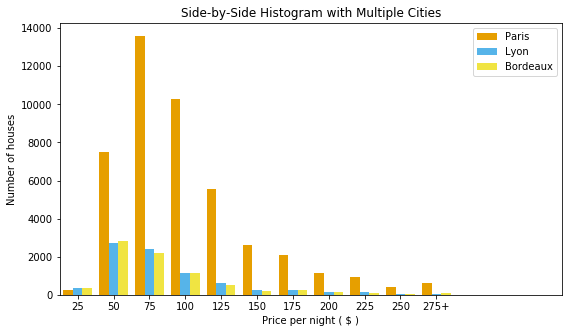

In [48]:
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,25)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)

x1 = price_paris = paris_listings['price']
x2 = price_lyon = lyon_listings['price']
x3 = price_bdx = bdx_listings['price']

colors = ['#E69F00', '#56B4E9', '#F0E442']
names = ['Paris', 'Lyon', 'Bordeaux']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x1, x2, x3], bins = bins,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Price per night ( $ )')
plt.ylabel('Number of houses')
plt.title('Side-by-Side Histogram with Multiple Cities')

Text(0.5, 1.0, 'Side-by-Side Histogram with Multiple Cities')

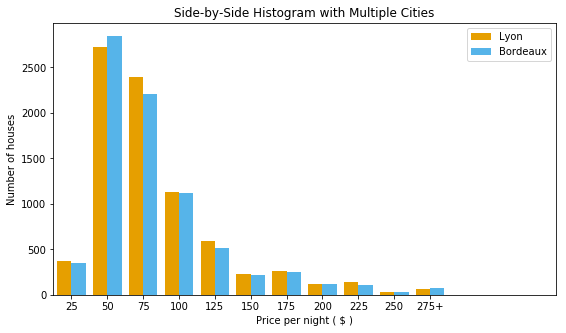

In [49]:
fig, ax = plt.subplots(figsize=(9, 5))
bins = np.arange(0,300,25)
xlabels = bins[1:].astype(str)
xlabels[-1] += '+'
N_labels = len(xlabels)
plt.xlim([0, 350])
plt.xticks(25 * np.arange(N_labels) + 12.5)
ax.set_xticklabels(xlabels)

x2 = price_lyon = lyon_listings['price']
x3 = price_bdx = bdx_listings['price']

colors = ['#E69F00', '#56B4E9']
names = ['Lyon', 'Bordeaux']
         
# Make the histogram using a list of lists
# Normalize the flights and assign colors and names
plt.hist([x2, x3], bins = bins,
         color = colors, label=names)

# Plot formatting
plt.legend()
plt.xlabel('Price per night ( $ )')
plt.ylabel('Number of houses')
plt.title('Side-by-Side Histogram with Multiple Cities')

As we can see, our datas har homogeneized (just Paris that has a lot of data but still fit)